In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data1=pd.read_csv('/content/drive/My Drive/datasets/ammonia_conc_vs_resp.csv')

In [ ]:
data2=pd.read_csv('/content/drive/My Drive/datasets/ammonia_known_conc_vs_Resp.csv')

In [ ]:
data3=pd.read_csv('/content/drive/My Drive/datasets/intefering_gases_time_vs_response.csv')

In [ ]:
data1.head()

,Time,Resistance1,Resistance2,Response1,Response2
0,0.00000,3.54776,2.01383,-34.88848,11.23069
1,0.00015,1.97162,2.05962,-7.79422,9.33812
2,0.00030,1.99642,2.07262,-0.94759,7.76505
3,0.00045,2.07417,2.12483,2.02154,6.87206
4,0.00060,2.07052,2.12208,3.66628,6.32576


In [ ]:
data2.head()

,Concentration,Response
0,0.5,12.10
1,2.0,117.03
2,4.0,236.58
3,7.0,906.08
4,10.0,2723.28


In [ ]:
data3.head()

,Time,Ammonia,Ethanol,Carbon,Acetone
0,1.50E-04,1.01138,-1.33164,-17.80098,1.08581
1,3.00E-04,1.01256,-1.3265,-17.84774,1.081
2,4.50E-04,1.01489,-1.31135,-17.91827,1.07644
3,6.00E-04,1.0142,-1.29306,-17.98638,1.07196
4,7.50E-04,1.01393,-1.26896,-18.06322,1.06749


In [ ]:
print(data1.columns.tolist())


['Time ', 'Resistance1', 'Resistance2', 'Response1', 'Response2']


In [ ]:
data1.columns = data1.columns.str.strip()

In [ ]:
data1=data1[["Time", "Resistance1", "Response1"]]

In [ ]:
data1.head()

,Time,Resistance1,Response1
0,0.00000,3.54776,-34.88848
1,0.00015,1.97162,-7.79422
2,0.00030,1.99642,-0.94759
3,0.00045,2.07417,2.02154
4,0.00060,2.07052,3.66628


In [ ]:
data1["Time_ms"]=data1["Time"]*1000

In [ ]:
data1.shape

(29311, 4)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29311 entries, 0 to 29310
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         29311 non-null  float64
 1   Resistance1  29311 non-null  float64
 2   Response1    29311 non-null  float64
 3   Time_ms      29311 non-null  float64
dtypes: float64(4)
memory usage: 916.1 KB


In [ ]:
data1.describe()

,Time,Resistance1,Response1,Time_ms
count,29311.000000,29311.000000,29311.000000,29311.000000
mean,2.200879,0.927429,17043.136222,2200.879052
std,1.271297,1.385404,49016.364439,1271.296991
min,0.000000,-71.133060,-34.888480,0.000000
25%,1.099425,0.070750,20.725195,1099.425000
50%,2.201600,0.842790,211.375860,2201.600000
75%,3.302015,1.640425,2722.211950,3302.015000
max,4.402470,112.930930,297429.385400,4402.470000


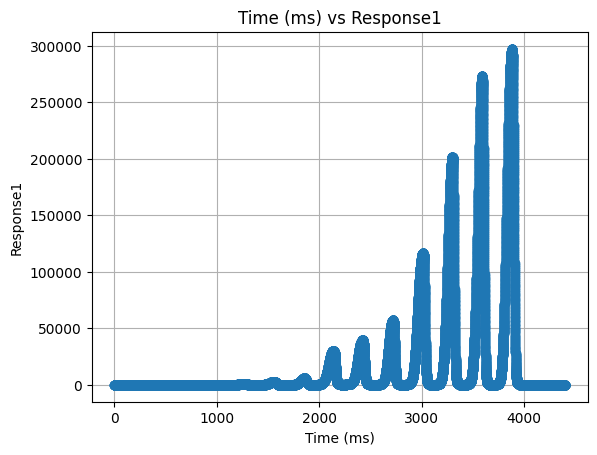

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data1["Time_ms"],data1["Response1"], marker='o')
plt.xlabel("Time (ms)")
plt.ylabel("Response1")
plt.title("Time (ms) vs Response1")
plt.grid(True)
plt.show()

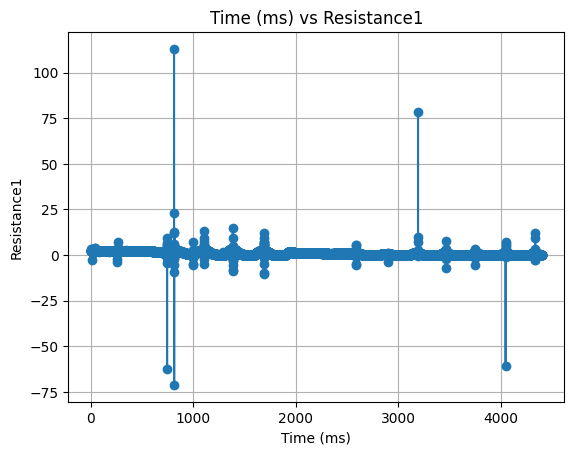

In [ ]:
plt.plot(data1["Time_ms"],data1["Resistance1"], marker='o')
plt.xlabel("Time (ms)")
plt.ylabel("Resistance1")
plt.title("Time (ms) vs Resistance1")
plt.grid(True)
plt.show()

<Axes: xlabel='Resistance1', ylabel='Response1'>

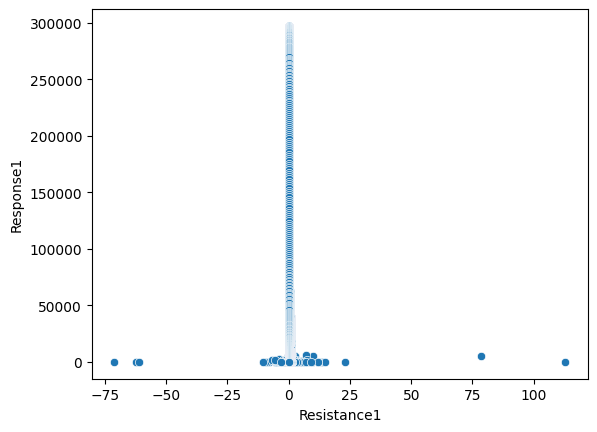

In [ ]:
import seaborn as sns
sns.scatterplot(x="Resistance1", y="Response1", data=data1)

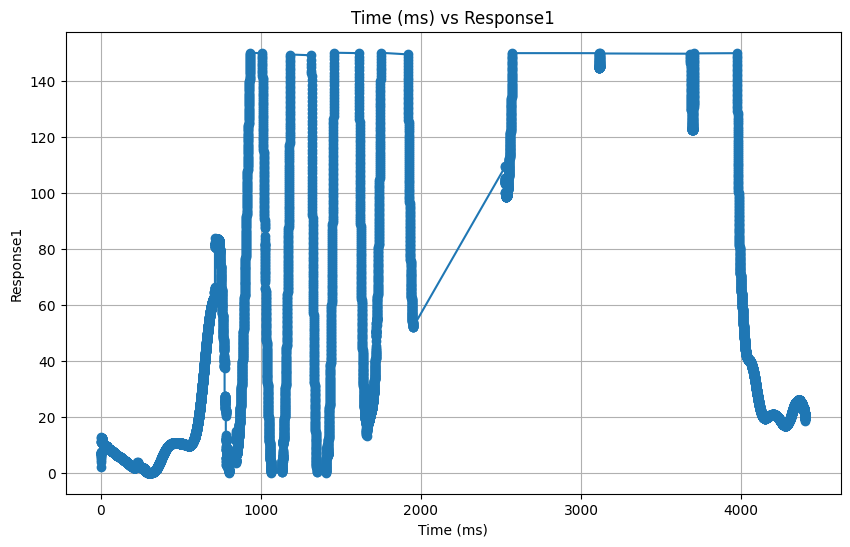

In [ ]:
df_filt=data1[(data1["Response1"]<150) & (data1["Response1"]>=0)]
plt.figure(figsize=(10, 6))
plt.plot(df_filt["Time_ms"], df_filt["Response1"], marker='o')
plt.xlabel("Time (ms)")
plt.ylabel("Response1")
plt.title("Time (ms) vs Response1")
plt.grid(True)

In [ ]:
data2

,Concentration,Response
0,0.5,12.10000
1,2.0,117.03000
2,4.0,236.58000
3,7.0,906.08000
4,10.0,2723.28000
5,12.0,5879.48000
6,14.0,30799.09000
7,16.0,63763.09086
8,18.0,111711.01050
9,20.0,156191.62190


In [ ]:
data2.describe()

,Concentration,Response
count,13.000000,13.000000
mean,13.423077,88357.913328
std,8.326279,110401.652367
min,0.500000,12.100000
25%,7.000000,906.080000
50%,14.000000,30799.090000
75%,20.000000,156191.621900
max,25.000000,298259.190000


In [ ]:
data2.corr()

,Concentration,Response
Concentration,1.000000,0.888118
Response,0.888118,1.000000


<Axes: xlabel='Concentration', ylabel='Response'>

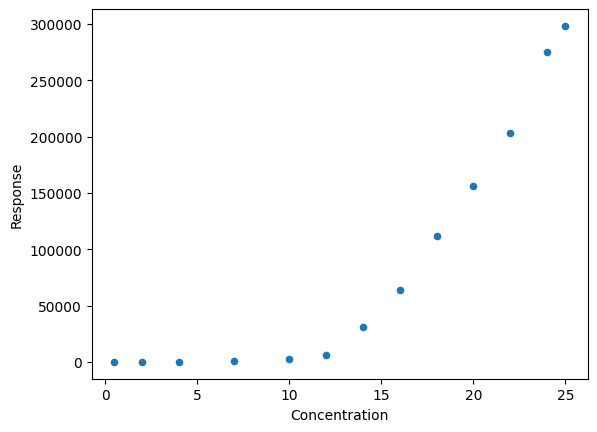

In [ ]:
data2.plot(y="Response", x="Concentration", kind="scatter")

<Axes: xlabel='Concentration'>

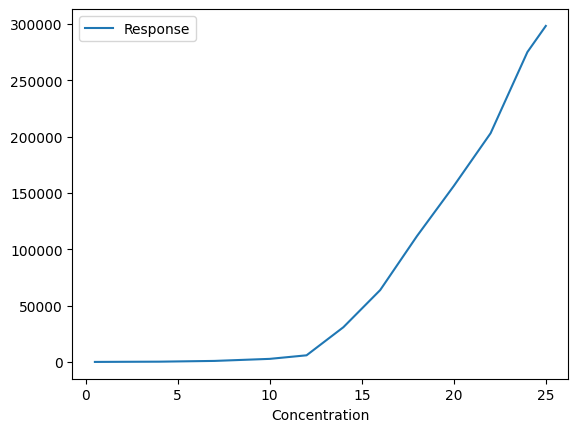

In [ ]:
data2.plot(y="Response", x="Concentration", kind="line")

In [ ]:
data2['log_response']=np.log(data2['Response'])

<Axes: xlabel='log_response', ylabel='Concentration'>

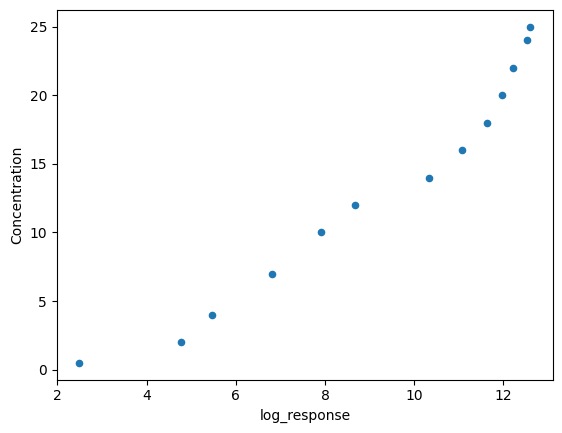

In [ ]:
data2.plot(x="log_response", y="Concentration", kind="scatter")

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
df21=data2.iloc[0 : 2]
df22=data2.iloc[1 : 6]
df23=data2.iloc[5 : ]

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
lr1 = LinearRegression()
lr1.fit(df21[['log_response']], df21['Concentration'])

LinearRegression()

In [ ]:
lr2 = LinearRegression()
lr2.fit(df22[['log_response']], df22['Concentration'])

LinearRegression()

In [ ]:
x=df23[['log_response']].values
y=df23['Concentration'].values

In [ ]:
poly = PolynomialFeatures(degree=2)   # start with quadratic
X_poly = poly.fit_transform(x)

In [ ]:
model=LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
y_pred = model.predict(X_poly)

from sklearn.metrics import r2_score
print("R²:", r2_score(y, y_pred))

R²: 0.9948212212072491


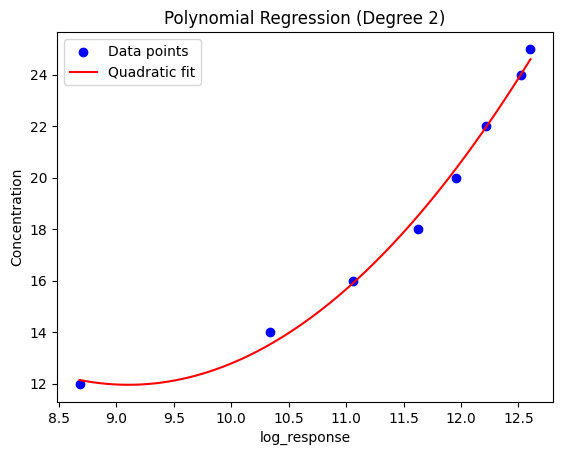

In [ ]:
X_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

plt.scatter(x, y, color='blue', label='Data points')
plt.plot(X_range, y_range_pred, color='red', label='Quadratic fit')
plt.xlabel('log_response')
plt.ylabel('Concentration')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()

In [ ]:
data2
# first model (till log_response value is <=4.763205)
# second model (till log_response value is <=8.679224)
# third model (till log_response value is >=8.679224)

,Concentration,Response,log_response
0,0.5,12.10000,2.493205
1,2.0,117.03000,4.762430
2,4.0,236.58000,5.466286
3,7.0,906.08000,6.809128
4,10.0,2723.28000,7.909592
5,12.0,5879.48000,8.679224
6,14.0,30799.09000,10.335240
7,16.0,63763.09086,11.062930
8,18.0,111711.01050,11.623671
9,20.0,156191.62190,11.958839


In [ ]:
def predict_concentration(log_response_value):
    # pick which model to use
    if pd.isna(log_response_value) or log_response_value<2.493205:
        return np.nan
    if log_response_value <= 4.762430 and log_response_value>=2.493205:
        X_val = np.array([[log_response_value]])
        y_pred = lr1.predict(X_val)

    elif log_response_value <= 8.679224:
        X_val = np.array([[log_response_value]])
        y_pred = lr2.predict(X_val)

    else:
        # for polynomial regression, transform first
        X_val_poly = poly.transform(np.array([[log_response_value]]))
        y_pred = model.predict(X_val_poly)

    return y_pred[0]

In [ ]:
data1.columns.tolist()

['Time', 'Resistance1', 'Response1', 'Time_ms']

In [ ]:
data1['log_response']=np.log(data1['Response1'])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
data1.isna().any()

,0
Time,False
Resistance1,False
Response1,False
Time_ms,False
log_response,True


In [ ]:
data1[data1['log_response'].isna()]

,Time,Resistance1,Response1,Time_ms,log_response
0,0.00000,3.54776,-34.88848,0.00,NaN
1,0.00015,1.97162,-7.79422,0.15,NaN
2,0.00030,1.99642,-0.94759,0.30,NaN
1902,0.28538,2.32166,-0.26077,285.38,NaN
1903,0.28553,2.32279,-0.26545,285.53,NaN
...,...,...,...,...,...
9358,1.40401,2.65087,-0.55181,1404.01,NaN
9359,1.40416,2.60106,-0.43386,1404.16,NaN
9360,1.40431,2.60482,-0.31166,1404.31,NaN
9361,1.40446,2.60713,-0.18797,1404.46,NaN


In [ ]:
data1.to_csv("predicted_nh3(1).csv", index=False)

In [ ]:
data4=pd.read_csv('/content/drive/My Drive/datasets/NH3_testing - Sheet1.csv')

In [ ]:
data4.head()

,Concentration,Response1,Response2
0,0.5,8.32,6.15
1,2.0,60.07,56.06
2,4.0,180.45,175.89
3,7.0,1057.04,926.31
4,10.0,2387.67,2294.73


<Axes: xlabel='Concentration', ylabel='Response1'>

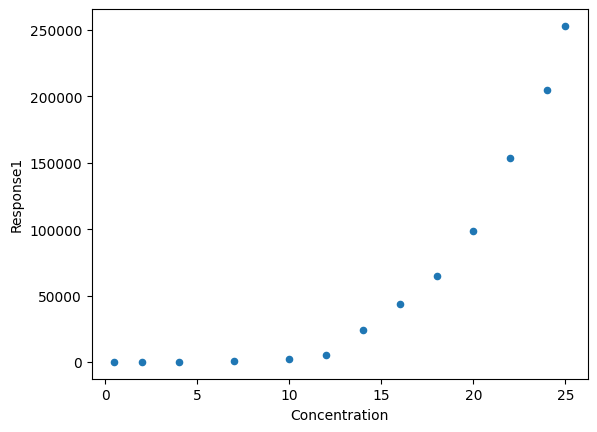

In [ ]:
data4.plot(y="Response1", x="Concentration", kind="scatter")

<Axes: xlabel='Concentration', ylabel='Response'>

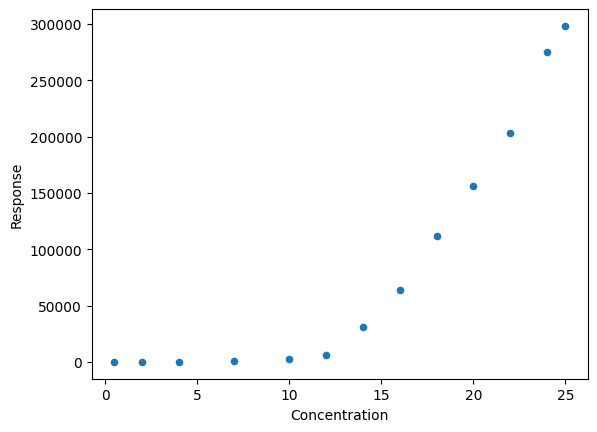

In [ ]:
data2.plot(y="Response", x="Concentration", kind="scatter")

In [ ]:
data4['log_response1']=np.log(data4['Response1'])

In [ ]:
data4['log_response2']=np.log(data4['Response2'])

<Axes: xlabel='log_response1', ylabel='Concentration'>

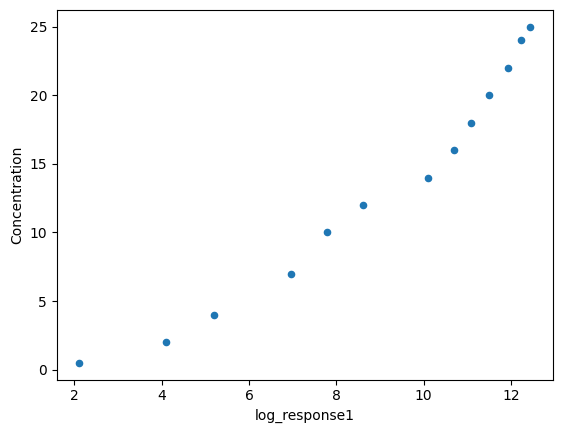

In [ ]:
data4.plot(x="log_response1", y="Concentration", kind="scatter")

In [ ]:
data5=pd.read_csv('/content/drive/My Drive/datasets/NH3_testing1 - Sheet1.csv')

In [ ]:
data5['avg_response']=(data5['Response1']+data5['Response2']+data5['Response0'])/3

<Axes: xlabel='Concentration', ylabel='avg_response'>

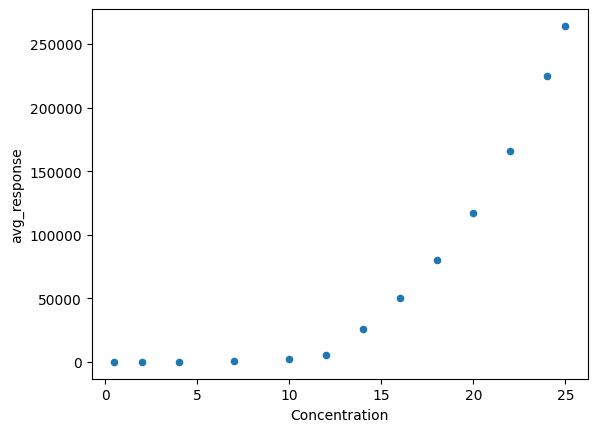

In [ ]:
data5.plot(y="avg_response", x="Concentration", kind="scatter")

In [ ]:
data5['log_avg_response']=np.log(data5['avg_response'])

<Axes: xlabel='log_avg_response', ylabel='Concentration'>

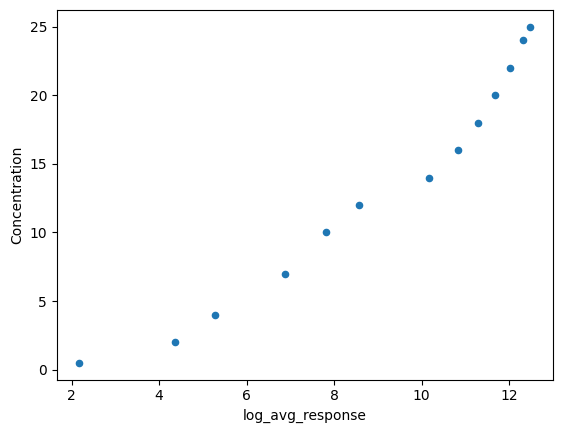

In [ ]:
data5.plot(x="log_avg_response", y="Concentration", kind="scatter")

In [ ]:
X=data5['Concentration'].values
y=data5['avg_response'].values

In [ ]:
from scipy.optimize import curve_fit
def four_param_logistic(x, a, b, c, d):
    x = np.array(x, dtype=float).ravel()   # flatten to 1D
    return (d + (a - d) / (1.0 + (x / c)**b)).ravel()


In [ ]:
p0 = [min(y), 1.0, np.median(x), max(y)]

# Fit with bounds
popt, pcov = curve_fit(
    four_param_logistic,
    X , y,
    p0=p0,
    bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]),
    maxfev=20000
)


In [ ]:
print("Fitted parameters:", popt)

Fitted parameters: [1.06305028e-12 4.52322042e+00 3.03220286e+01 8.86472150e+05]


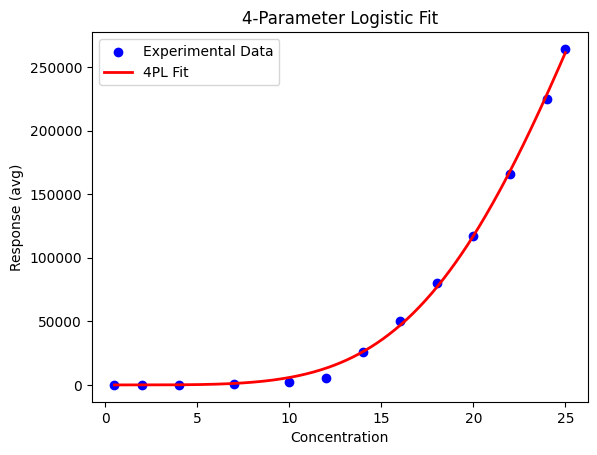

In [ ]:
x_pred = np.linspace(min(X), max(X), 300)   # 300 points between min and max
y_pred = four_param_logistic(x_pred, *popt) # predicted response from 4PL fit

# Plot raw data
plt.scatter(X, y, color="blue", label="Experimental Data")

# Plot fitted curve
plt.plot(x_pred, y_pred, color="red", linewidth=2, label="4PL Fit")

# Labels and legend
plt.xlabel("Concentration")
plt.ylabel("Response (avg)")
plt.title("4-Parameter Logistic Fit")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

y_fit = four_param_logistic(X, *popt)  # predicted values at your actual concentrations
r2 = r2_score(y, y_fit)
print("R² =", r2)

R² = 0.9988180204027928


In [ ]:
print(r2)

0.9988180204027928


In [ ]:
y=data5['Concentration'].values
x=data5['avg_response'].values

In [ ]:
p0 = [min(y), 1.0, np.median(x), max(y)]

# Fit with bounds
popt, pcov = curve_fit(
    four_param_logistic,
    x, y,
    p0=p0,
    bounds=([0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf]),
    maxfev=20000
)


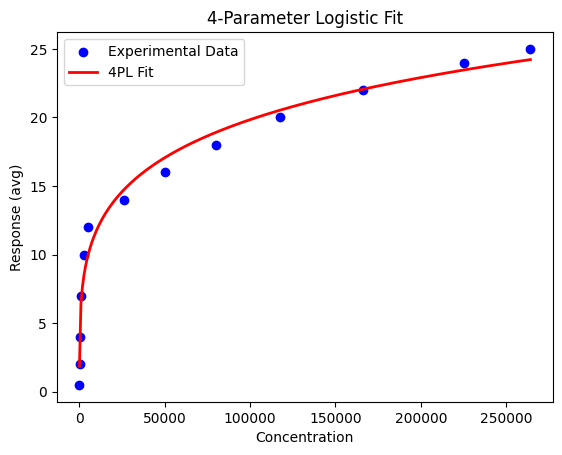

In [ ]:
x_pred = np.linspace(min(x), max(x), 300)   # 300 points between min and max
y_pred = four_param_logistic(x_pred, *popt) # predicted response from 4PL fit

# Plot raw data
plt.scatter(x, y, color="blue", label="Experimental Data")

# Plot fitted curve
plt.plot(x_pred, y_pred, color="red", linewidth=2, label="4PL Fit")

# Labels and legend
plt.xlabel("Concentration")
plt.ylabel("Response (avg)")
plt.title("4-Parameter Logistic Fit")
plt.legend()
plt.show()

In [ ]:
y_fit = four_param_logistic(x, *popt)  # predicted values at your actual concentrations
r2 = r2_score(y, y_fit)
print("R² =", r2)

R² = 0.9828829136594889


In [ ]:
def five_param_logistic(x, a, b, c, d, g):
    return d + (a - d) / ( (1.0 + (x / c)**b) ** g )

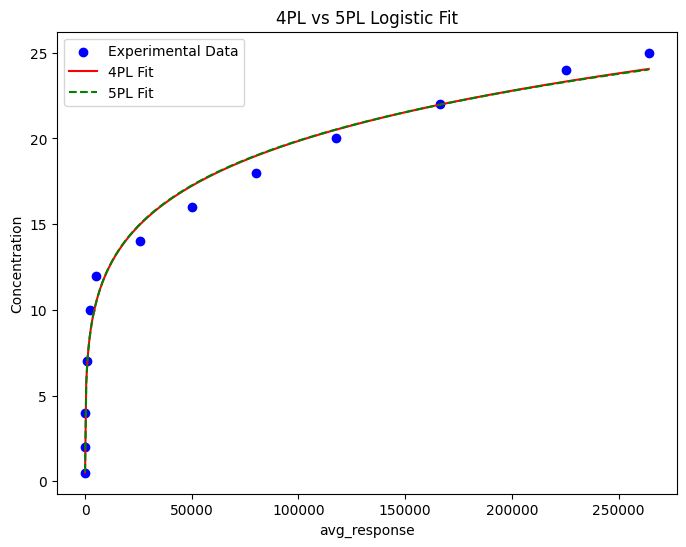

In [ ]:
p0_4pl = [min(y), 1, np.median(x), max(y)]
p0_5pl = [min(y), 1, np.median(x), max(y), 1]

# Fit 4PL
popt_4pl, _ = curve_fit(four_param_logistic, x, y, p0=p0_4pl, maxfev=10000)

# Fit 5PL
popt_5pl, _ = curve_fit(five_param_logistic, x, y, p0=p0_5pl, maxfev=20000)

# Generate smooth curve
x_fit = np.linspace(min(x), max(x), 500)
y_fit_4pl = four_param_logistic(x_fit, *popt_4pl)
y_fit_5pl = five_param_logistic(x_fit, *popt_5pl)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Experimental Data")
plt.plot(x_fit, y_fit_4pl, 'r-', label="4PL Fit")
plt.plot(x_fit, y_fit_5pl, 'g--', label="5PL Fit")
plt.xlabel("avg_response")
plt.ylabel("Concentration")
plt.title("4PL vs 5PL Logistic Fit")
plt.legend()
plt.show()

In [ ]:
y_pred_4pl = four_param_logistic(x, *popt_4pl)
y_pred_5pl = five_param_logistic(x, *popt_5pl)
from sklearn.metrics import r2_score, mean_squared_error
r2_4pl = r2_score(y, y_pred_4pl)
r2_5pl = r2_score(y, y_pred_5pl)
rmse_4pl = np.sqrt(mean_squared_error(y, y_pred_4pl))
rmse_5pl = np.sqrt(mean_squared_error(y, y_pred_5pl))

print("📊 Model Performance:")
print(f"4PL: R² = {r2_4pl:.4f}, RMSE = {rmse_4pl:.4f}")
print(f"5PL: R² = {r2_5pl:.4f}, RMSE = {rmse_5pl:.4f}")

📊 Model Performance:
4PL: R² = 0.9882, RMSE = 0.8706
5PL: R² = 0.9878, RMSE = 0.8823


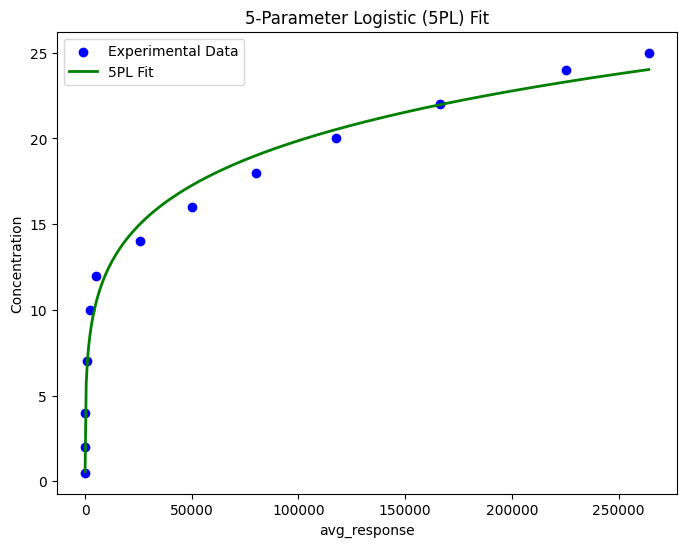

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Experimental Data")
plt.plot(x_fit, y_fit_5pl, 'g-', linewidth=2, label="5PL Fit")
plt.xlabel("avg_response")
plt.ylabel("Concentration")
plt.title("5-Parameter Logistic (5PL) Fit")
plt.legend()
plt.show()

📊 SVR: R² = 0.9998, RMSE = 0.1001


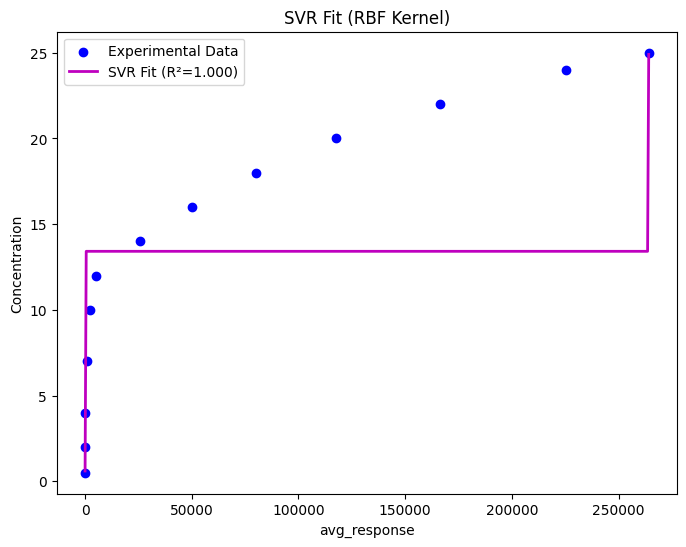

In [ ]:
import numpy as np
from sklearn.svm import SVR

# x = avg_response, y = concentration (already defined earlier)

# Reshape for sklearn
X = x.reshape(-1, 1)
y_vals = y  # keep as 1D

# Fit SVR with RBF kernel
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X, y_vals)

# Predict on smooth grid
x_fit = np.linspace(min(x), max(x), 500).reshape(-1, 1)
y_fit_svr = svr.predict(x_fit)

# Predict on training points
y_pred_svr = svr.predict(X)

# Evaluate performance
r2_svr = r2_score(y_vals, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_vals, y_pred_svr))

print(f"📊 SVR: R² = {r2_svr:.4f}, RMSE = {rmse_svr:.4f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Experimental Data")
plt.plot(x_fit, y_fit_svr, 'm-', linewidth=2, label=f"SVR Fit (R²={r2_svr:.3f})")
plt.xlabel("avg_response")
plt.ylabel("Concentration")
plt.title("SVR Fit (RBF Kernel)")
plt.legend()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


📊 GPR: R² = 1.0000, RMSE = 0.0000


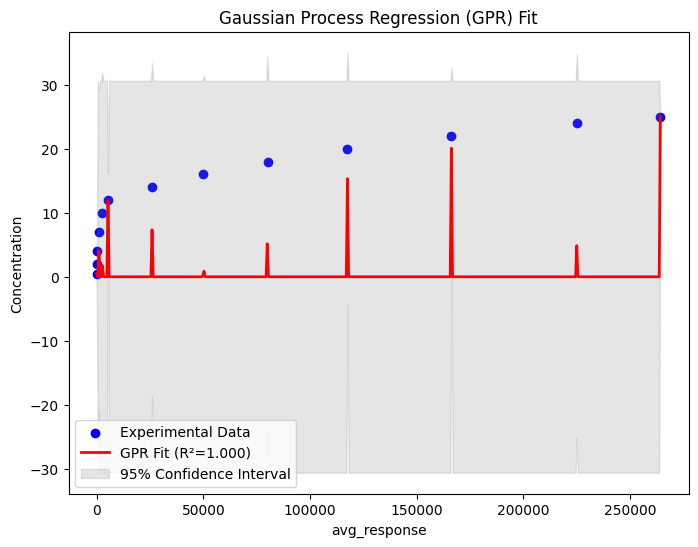

In [ ]:
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Prepare data
X = x.reshape(-1, 1)
y_vals = y

# Kernel: constant * RBF (smooth Gaussian curve)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-6)

# Fit
gpr.fit(X, y_vals)

# Predict
x_fit = np.linspace(min(x), max(x), 500).reshape(-1, 1)
y_fit_gpr, sigma = gpr.predict(x_fit, return_std=True)

# Evaluate
y_pred_train, _ = gpr.predict(X, return_std=True)
r2_gpr = r2_score(y_vals, y_pred_train)
rmse_gpr = np.sqrt(mean_squared_error(y_vals, y_pred_train))

print(f"📊 GPR: R² = {r2_gpr:.4f}, RMSE = {rmse_gpr:.4f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Experimental Data")
plt.plot(x_fit, y_fit_gpr, 'r-', linewidth=2, label=f"GPR Fit (R²={r2_gpr:.3f})")
plt.fill_between(x_fit.ravel(), y_fit_gpr - 1.96*sigma, y_fit_gpr + 1.96*sigma,
                 alpha=0.2, color="gray", label="95% Confidence Interval")
plt.xlabel("avg_response")
plt.ylabel("Concentration")
plt.title("Gaussian Process Regression (GPR) Fit")
plt.legend()
plt.show()


Fitted parameters: L=22.755, k=0.000038, x0=26743.0


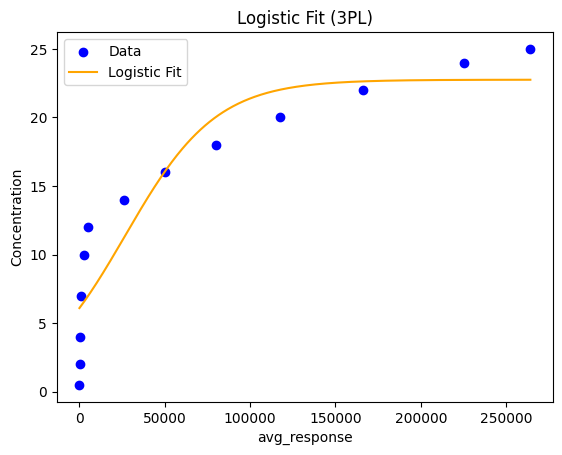

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Your data
x = data5["avg_response"].values
y = data5["Concentration"].values

# --- 3-parameter logistic ---
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Initial guesses:
# L ~ max(y), slope k small (~1e-5 since x is large), x0 ~ median(x)
p0 = [max(y), 1e-5, np.median(x)]

# Fit
popt, _ = curve_fit(logistic, x, y, p0=p0, maxfev=20000)

# Parameters
L, k, x0 = popt
print(f"Fitted parameters: L={L:.3f}, k={k:.6f}, x0={x0:.1f}")

# Plot
x_fit = np.linspace(min(x), max(x), 500)
y_fit = logistic(x_fit, *popt)

plt.scatter(x, y, color="blue", label="Data")
plt.plot(x_fit, y_fit, color="orange", label="Logistic Fit")
plt.xlabel("avg_response")
plt.ylabel("Concentration")
plt.legend()
plt.title("Logistic Fit (3PL)")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Dictionary to store results
rmse_replicates = {}

# Loop over replicate columns
for col in ["Response1", "Response2", "Response0"]:
    y_rep = data5[col].values
    # Predictions from 4PL and 5PL using same fitted params
    y_pred_4pl_rep = four_param_logistic(x, *popt_4pl)
    y_pred_5pl_rep = five_param_logistic(x, *popt_5pl)

    rmse_4pl_rep = np.sqrt(mean_squared_error(y_rep, y_pred_4pl_rep))
    rmse_5pl_rep = np.sqrt(mean_squared_error(y_rep, y_pred_5pl_rep))

    rmse_replicates[col] = {
        "RMSE_4PL": rmse_4pl_rep,
        "RMSE_5PL": rmse_5pl_rep
    }

# Print results
print("\n📊 RMSE per replicate:")
for col, metrics in rmse_replicates.items():
    print(f"{col}: 4PL RMSE = {metrics['RMSE_4PL']:.4f}, 5PL RMSE = {metrics['RMSE_5PL']:.4f}")



📊 RMSE per replicate:
Response1: 4PL RMSE = 105957.2365, 5PL RMSE = 105957.2315
Response2: 4PL RMSE = 100987.1182, 5PL RMSE = 100987.1132
Response0: 4PL RMSE = 138050.0713, 5PL RMSE = 138050.0660


In [ ]:
data5.plot(x="avg_response", y="Concentration", kind="scatter")